In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GZQJhkzwfnVCnfRzRhJf")
project = rf.workspace("bryan-b56jm").project("tomato-leaf-disease-ssoha")
version = project.version(63)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sigstore 3.6.1 requires rich~=13.0, but you have rich 14.0.0 which is incompatible.
datasets 3.5.0 requires fsspec[http]<=2024.12.0,>=2023.1.0, 


Extracting Dataset Version Zip to Tomato-Leaf-Disease-63 in yolov11:: 100%|██████████| 20106/20106 [00:02<00:00, 7736.61it/s]


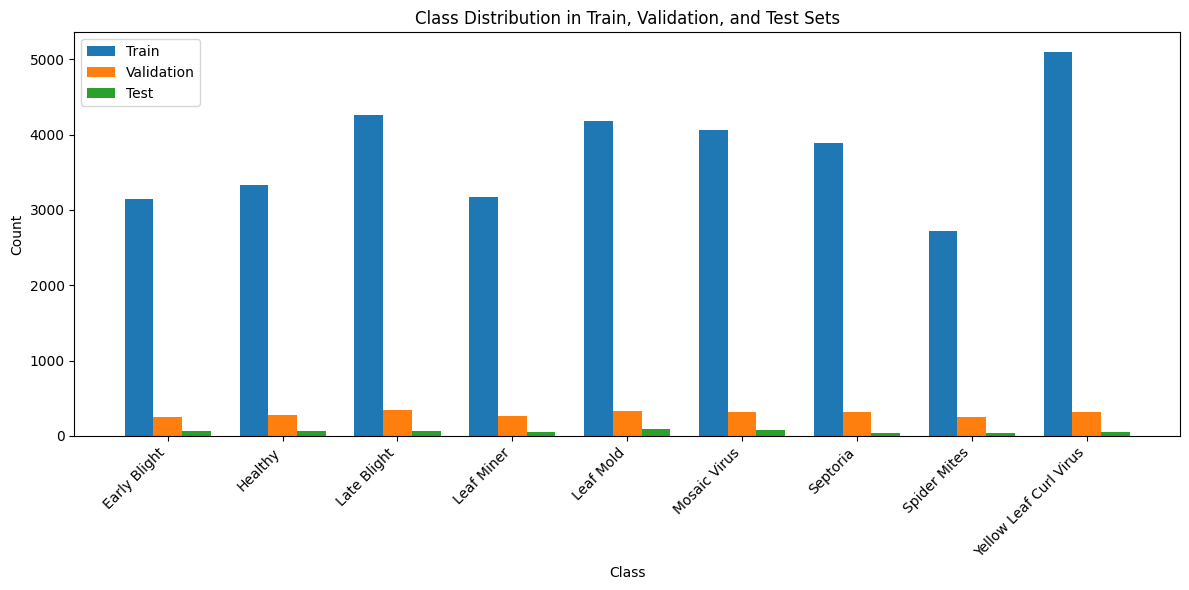

In [2]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Updated class names (9 classes)
class_names = [
    'Early Blight', 'Healthy', 'Late Blight', 'Leaf Miner', 
    'Leaf Mold', 'Mosaic Virus', 'Septoria', 'Spider Mites', 'Yellow Leaf Curl Virus'
]

def count_classes(label_path):
    counts = Counter()
    if not os.path.exists(label_path):
        return counts  # return empty if no such folder
    for file in os.listdir(label_path):
        if file.endswith('.txt'):
            with open(os.path.join(label_path, file)) as f:
                for line in f:
                    cls = int(line.split()[0])
                    counts[cls] += 1
    return counts

# Replace this with your actual dataset path
dataset_path = "/kaggle/working/Tomato-Leaf-Disease-63"
train_labels = os.path.join(dataset_path, "train", "labels")
val_labels   = os.path.join(dataset_path, "valid", "labels")
test_labels  = os.path.join(dataset_path, "test", "labels")

# Count class instances
train_counts = count_classes(train_labels)
val_counts   = count_classes(val_labels)
test_counts  = count_classes(test_labels)

# Ensure all classes are represented
indices = list(range(len(class_names)))
train_values = [train_counts.get(i, 0) for i in indices]
val_values   = [val_counts.get(i, 0) for i in indices]
test_values  = [test_counts.get(i, 0) for i in indices]

# Plotting
bar_width = 0.25
x = range(len(class_names))

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width for i in x], train_values, width=bar_width, label='Train')
plt.bar(x, val_values, width=bar_width, label='Validation')
plt.bar([i + bar_width for i in x], test_values, width=bar_width, label='Test')
plt.xticks(x, class_names, rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Train, Validation, and Test Sets")
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is incompatible.
pylibcugraph-cu12 24.12.0 requires rmm-cu12==24.12.*, but you have rmm-

In [4]:
# Import libraries
import pandas as pd
import os
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm
import cv2
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
import multiprocessing
import numpy as np
from PIL import Image
from ultralytics.data.dataset import YOLODataset
import ultralytics.data.build as build


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
class YOLOWeightedDataset(YOLODataset):
    def __init__(self, *args, mode="train", **kwargs):
        """
        Initialize the WeightedDataset.

        Args:
            class_weights (list or numpy array): A list or array of weights corresponding to each class.
        """

        super(YOLOWeightedDataset, self).__init__(*args, **kwargs)

        self.train_mode = "train" in self.prefix

        # You can also specify weights manually instead
        self.count_instances()
        class_weights = np.sum(self.counts) / self.counts
        self.agg_func = np.mean

        self.class_weights = np.array(class_weights)
        self.weights = self.calculate_weights()
        self.probabilities = self.calculate_probabilities()

    def count_instances(self):
        """
        Count the number of instances per class

        Returns:
            dict: A dict containing the counts for each class.
        """
        self.counts = [0 for i in range(len(self.data["names"]))]
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)
            for id in cls:
                self.counts[id] += 1

        self.counts = np.array(self.counts)
        self.counts = np.where(self.counts == 0, 1, self.counts)

    def calculate_weights(self):
        """
        Calculate the aggregated weight for each label based on class weights.

        Returns:
            list: A list of aggregated weights corresponding to each label.
        """
        weights = []
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)

            # Give a default weight to background class
            if cls.size == 0:
              weights.append(1)
              continue

            # Take mean of weights
            # You can change this weight aggregation function to aggregate weights differently
            # weight = np.mean(self.class_weights[cls])
            # weight = np.max(self.class_weights[cls])
            weight = self.agg_func(self.class_weights[cls])
            weights.append(weight)
        return weights

    def calculate_probabilities(self):
        """
        Calculate and store the sampling probabilities based on the weights.

        Returns:
            list: A list of sampling probabilities corresponding to each label.
        """
        total_weight = sum(self.weights)
        probabilities = [w / total_weight for w in self.weights]
        return probabilities

    def __getitem__(self, index):
        """
        Return transformed label information based on the sampled index.
        """
        # Don't use for validation
        if not self.train_mode:
            return self.transforms(self.get_image_and_label(index))
        else:
            index = np.random.choice(len(self.labels), p=self.probabilities)
            return self.transforms(self.get_image_and_label(index))
build.YOLODataset = YOLOWeightedDataset

In [6]:
from pathlib import Path
import yaml

# Define dataset directories
DATASETS_DIR = Path('/kaggle/working/Tomato-Leaf-Disease-63')
TRAIN_IMAGES_DIR = DATASETS_DIR / "train/images"
VAL_IMAGES_DIR = DATASETS_DIR / "valid/images"
TEST_IMAGES_DIR = DATASETS_DIR / "test/images"

data_yaml = {
    "path" : str(DATASETS_DIR.resolve()), 
    "train": str(TRAIN_IMAGES_DIR.resolve()),
    "val"  : str(VAL_IMAGES_DIR.resolve()),
    "test" : str(TEST_IMAGES_DIR.resolve()),
    "nc"   : 9,
    "names": ['Early Blight', 'Healthy', 'Late Blight', 'Leaf Miner', 'Leaf Mold', 'Mosaic Virus', 'Septoria', 'Spider Mites', 'Yellow Leaf Curl Virus']
}

yaml_path = '/kaggle/working/data_new.yaml'
with open(yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

# Preview data yaml file
data_yaml


{'path': '/kaggle/working/Tomato-Leaf-Disease-63',
 'train': '/kaggle/working/Tomato-Leaf-Disease-63/train/images',
 'val': '/kaggle/working/Tomato-Leaf-Disease-63/valid/images',
 'test': '/kaggle/working/Tomato-Leaf-Disease-63/test/images',
 'nc': 9,
 'names': ['Early Blight',
  'Healthy',
  'Late Blight',
  'Leaf Miner',
  'Leaf Mold',
  'Mosaic Virus',
  'Septoria',
  'Spider Mites',
  'Yellow Leaf Curl Virus']}

In [7]:
# Load a yolo pretrained model
model = YOLO('yolo11m.pt')

# Fine tune model to our data
model.train(
    data='/kaggle/working/data_new.yaml',          # Path to the dataset configuration
    epochs=180,                 # Number of epochs
    imgsz=512,                # Image size (height, width)
    batch=32,                   # Batch size
    device=0,                  # Device to use (0 for the first GPU)
    patience=15,
    name = 'tomato_disease_new_data_yolo11m')

100%|██████████| 38.8M/38.8M [00:00<00:00, 217MB/s]


Ultralytics 8.3.120 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/working/data_new.yaml, epochs=180, time=None, patience=15, batch=32, imgsz=512, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=tomato_disease_new_data_yolo11m, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 16.7MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1182.4±194.9 MB/s, size: 52.3 KB)


train: Scanning /kaggle/working/Tomato-Leaf-Disease-63/train/labels... 9039 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9039/9039 [00:06<00:00, 1340.20it/s]


train: New cache created: /kaggle/working/Tomato-Leaf-Disease-63/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 355.3±242.4 MB/s, size: 44.2 KB)


val: Scanning /kaggle/working/Tomato-Leaf-Disease-63/valid/labels... 843 images, 0 backgrounds, 0 corrupt: 100%|██████████| 843/843 [00:01<00:00, 586.59it/s]

val: New cache created: /kaggle/working/Tomato-Leaf-Disease-63/valid/labels.cache


Plotting labels to runs/detect/tomato_disease_new_data_yolo11m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to runs/detect/tomato_disease_new_data_yolo11m
Starting training for 180 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/180      9.84G     0.7971      1.706       1.21        102        512: 100%|██████████| 283/283 [03:24<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]


                   all        843       2680      0.808      0.783      0.857      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/180      9.83G     0.7264     0.9039      1.115         93        512: 100%|██████████| 283/283 [03:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.847      0.767       0.86      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/180        10G     0.7918     0.9734      1.158         91        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.609      0.585       0.58      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/180      9.88G     0.8504      1.039      1.199         89        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]


                   all        843       2680      0.816       0.76      0.846      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/180      9.91G     0.8094     0.9539      1.179        120        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.839      0.719      0.823      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/180      9.88G     0.7866     0.8916      1.168         92        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.801      0.766      0.841      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/180        10G     0.7646     0.8608      1.156        111        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]

                   all        843       2680      0.856      0.813        0.9      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/180      9.98G     0.7414     0.7986      1.138        105        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]

                   all        843       2680      0.901      0.841      0.928      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/180        10G      0.732     0.7696      1.128        110        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]

                   all        843       2680      0.878      0.825      0.911      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/180      9.87G     0.7173     0.7461      1.123        104        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.904       0.85      0.939      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/180      9.98G     0.7113      0.725      1.122        137        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.912      0.833      0.933      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/180      9.99G     0.7136     0.7119      1.114        107        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.925      0.861       0.95      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/180        10G     0.6937     0.6856      1.104        120        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.918      0.842      0.936      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/180        10G     0.6938     0.6751      1.104         84        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.911      0.878      0.945      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/180        10G     0.6756     0.6511      1.096         87        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.919      0.871      0.943      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/180      9.91G     0.6702     0.6436      1.088        107        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.916      0.855      0.938      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/180      9.97G      0.669     0.6276      1.085        124        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.915      0.888      0.947      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/180       9.9G     0.6602     0.6187      1.084        100        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.906      0.869       0.94      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/180        10G      0.658       0.61      1.084         92        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680       0.92      0.886      0.955      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/180      9.99G     0.6435     0.5926      1.074        112        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.918      0.891      0.958      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/180      9.98G     0.6353     0.5726      1.069        106        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.916      0.879      0.949      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/180      9.89G     0.6385      0.579      1.074        105        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.931      0.886       0.96      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/180        10G     0.6399     0.5652      1.065        120        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.923      0.899      0.961      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/180      9.91G     0.6321      0.556      1.069        105        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.932      0.878      0.955      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/180      9.98G     0.6271     0.5576      1.062        101        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680       0.92       0.91      0.963      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/180      9.97G     0.6199     0.5466      1.061         95        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.41it/s]

                   all        843       2680      0.942      0.893      0.967      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/180        10G     0.6185     0.5401       1.06         98        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680       0.94      0.907      0.969      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/180      9.91G     0.6207     0.5387      1.058         96        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.41it/s]

                   all        843       2680      0.934      0.914      0.969      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/180      9.97G     0.6207     0.5331      1.054         88        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.925      0.919      0.965      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/180      9.86G      0.615      0.529       1.05         92        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.938      0.905      0.967      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/180      9.98G     0.5978     0.5111      1.048        111        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.932       0.91      0.967      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/180      9.99G     0.6022     0.5053      1.051         92        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.943      0.914      0.971      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/180      9.97G     0.6007     0.5061      1.046        111        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.942      0.916       0.97      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/180        10G     0.5958     0.5009      1.047        138        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.931      0.918      0.968      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/180      9.98G     0.5907      0.495      1.043         91        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.942      0.917      0.971       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/180       9.9G     0.5907     0.4862      1.041         84        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.939      0.913      0.971      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/180      9.98G     0.5961     0.4834      1.041         85        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.936      0.925       0.97       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/180      9.92G     0.5839     0.4783      1.039        127        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.947      0.912      0.972      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/180      9.98G     0.5916     0.4821      1.042        119        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680       0.94      0.924      0.974      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/180       9.9G     0.5848     0.4711      1.033         93        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.946      0.907       0.97      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/180        10G     0.5738     0.4641      1.026         81        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.41it/s]

                   all        843       2680      0.946      0.916      0.969      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/180      9.91G     0.5683     0.4576      1.027        139        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.939      0.934      0.974      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/180      9.97G     0.5702      0.457      1.028         86        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.939      0.914      0.969      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/180      9.98G      0.577     0.4616      1.032         91        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.41it/s]

                   all        843       2680       0.94      0.926      0.973      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/180      9.98G     0.5653     0.4509      1.026         96        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.953      0.921      0.972      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/180       9.9G      0.565     0.4498       1.02         82        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.941      0.927      0.972      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/180      9.99G     0.5644     0.4497      1.025         99        512: 100%|██████████| 283/283 [03:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]

                   all        843       2680      0.949      0.931      0.973       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/180      9.97G     0.5622     0.4502      1.025        119        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]

                   all        843       2680      0.942      0.937      0.973      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/180        10G     0.5497     0.4305      1.021         87        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680       0.95      0.935      0.975      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/180      9.98G     0.5572     0.4332       1.02         95        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.941      0.934      0.973      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/180      9.97G     0.5527     0.4319      1.019         85        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.41it/s]

                   all        843       2680      0.951      0.921      0.974       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/180       9.9G     0.5589     0.4321      1.021        112        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.948       0.92      0.974      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/180        10G     0.5501     0.4262      1.015         97        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.941      0.936      0.976      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/180      9.93G     0.5502     0.4246      1.016         69        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.942      0.927      0.973      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/180      9.99G     0.5441     0.4213      1.015        126        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.943       0.93      0.976      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/180       9.9G     0.5532     0.4224      1.015         85        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.949      0.924      0.972      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/180      9.99G     0.5455     0.4183      1.011         89        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680       0.95      0.924      0.973      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/180      9.96G      0.551     0.4191      1.013        101        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.947      0.925      0.973      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/180      9.96G      0.539     0.4111      1.008         73        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.948      0.934      0.974      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/180      9.92G     0.5443      0.411      1.009         86        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.947      0.932      0.973      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/180        10G     0.5391     0.4051      1.006         95        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.951      0.934      0.974      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/180      9.89G     0.5293     0.4015      1.007         71        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.951      0.929      0.972      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/180        10G     0.5282      0.393      1.006         83        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.954      0.928      0.974      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/180      9.93G     0.5293     0.4017      1.006         82        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.958      0.923      0.974      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/180      9.97G     0.5227     0.3974     0.9971         88        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.953      0.933      0.975      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/180      9.99G     0.5246      0.388     0.9976         88        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.951      0.931      0.974      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/180      9.99G     0.5213     0.3925      1.002        142        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680       0.95      0.934      0.974      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/180      9.97G     0.5174     0.3861      1.001         72        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.949      0.936      0.973      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/180      9.99G     0.5143     0.3837     0.9937        107        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.951      0.932      0.974      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/180      9.96G     0.5293     0.3889     0.9973         94        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.949      0.935      0.974      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/180      9.97G     0.5186     0.3799      0.996        130        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.952       0.93      0.974       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/180        10G     0.5122     0.3795     0.9939         99        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.947       0.93      0.974      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/180        10G     0.5223      0.385     0.9914         89        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.955       0.93      0.976      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/180       9.9G     0.5044     0.3707     0.9944         90        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.948      0.936      0.977      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/180      9.98G     0.5242      0.382     0.9953         65        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680       0.94      0.945      0.976      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/180      9.85G     0.5108     0.3712     0.9903         96        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.946      0.938      0.976      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/180        10G     0.5153     0.3732     0.9927        135        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.948      0.933      0.976      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/180      9.89G     0.5025     0.3636     0.9884         76        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680       0.95      0.934      0.976       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/180      9.98G     0.5084     0.3684     0.9907         87        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.951      0.936      0.975      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/180      9.98G     0.5037     0.3698     0.9909        122        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.951      0.935      0.976      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/180        10G     0.5021     0.3632     0.9877         66        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.946       0.94      0.976      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/180      9.93G     0.5044     0.3636     0.9855        117        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.948      0.938      0.977      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/180        10G     0.4962     0.3561     0.9837         99        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.951      0.936      0.977      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/180      9.91G     0.4902     0.3537      0.982         93        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680       0.95      0.939      0.977      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/180        10G     0.5067       0.36     0.9843        108        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.949      0.937      0.977      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/180       9.9G     0.4894     0.3431     0.9791         90        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.953      0.935      0.977      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/180        10G     0.4968     0.3516     0.9828         62        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.954      0.935      0.977      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/180       9.9G     0.4905     0.3488     0.9805         81        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.953      0.936      0.977      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/180        10G     0.4856     0.3419     0.9798        104        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.947       0.94      0.977      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/180      9.98G     0.4835     0.3428     0.9805         75        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.953      0.933      0.977      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/180        10G     0.4792     0.3409     0.9776        100        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.952      0.934      0.977      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/180        10G     0.4804     0.3442     0.9757         78        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]

                   all        843       2680      0.949      0.937      0.977      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/180      9.96G     0.4846     0.3434      0.977        106        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.953      0.935      0.976      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/180       9.9G     0.4819     0.3384     0.9745        140        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.952      0.935      0.976      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/180      9.98G      0.474     0.3313     0.9719         90        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.952      0.936      0.975      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/180      9.92G      0.474     0.3343     0.9725        121        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.952      0.936      0.975      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/180      9.98G     0.4752     0.3304      0.971        112        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.941      0.944      0.975      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/180      9.99G      0.469     0.3306     0.9674         80        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.945      0.941      0.975      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/180      9.98G       0.47     0.3255     0.9706        118        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.948      0.941      0.975      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/180      9.97G     0.4675     0.3282      0.969         86        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680       0.95      0.939      0.975      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/180      9.97G     0.4657     0.3301     0.9668         86        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        843       2680      0.953      0.934      0.975      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/180      9.93G     0.4588     0.3229     0.9669        114        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]

                   all        843       2680       0.95      0.937      0.975      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/180        10G     0.4661     0.3208     0.9669         81        512: 100%|██████████| 283/283 [03:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680      0.951      0.939      0.975      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/180       9.9G      0.462     0.3183     0.9651         67        512: 100%|██████████| 283/283 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all        843       2680       0.95      0.938      0.975      0.933
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 89, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



104 epochs completed in 6.448 hours.
Optimizer stripped from runs/detect/tomato_disease_new_data_yolo11m/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/tomato_disease_new_data_yolo11m/weights/best.pt, 40.5MB

Validating runs/detect/tomato_disease_new_data_yolo11m/weights/best.pt...
Ultralytics 8.3.120 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,036,971 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]


                   all        843       2680      0.948       0.94      0.977      0.934
          Early Blight        214        252      0.945      0.948      0.981      0.948
               Healthy         76        277      0.897      0.911      0.954      0.891
           Late Blight        238        344      0.959      0.953      0.989      0.954
            Leaf Miner        199        259      0.979          1      0.995      0.977
             Leaf Mold        211        338      0.946      0.932       0.98      0.938
          Mosaic Virus        250        319      0.967      0.947       0.98       0.96
              Septoria        203        324      0.954       0.92      0.977      0.933
          Spider Mites        123        252      0.977      0.976      0.984       0.97
Yellow Leaf Curl Virus        152        315      0.912      0.873      0.955      0.836


invalid value encountered in less
invalid value encountered in less


Speed: 0.1ms preprocess, 8.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/tomato_disease_new_data_yolo11m


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788ff8eaf790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

In [8]:
# Model Evaluation: Evaluating on the validation set
results = model.val(data='/kaggle/working/data_new.yaml')

Ultralytics 8.3.120 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,036,971 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1202.5±468.1 MB/s, size: 48.3 KB)


val: Scanning /kaggle/working/Tomato-Leaf-Disease-63/valid/labels.cache... 843 images, 0 backgrounds, 0 corrupt: 100%|██████████| 843/843 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:21<00:00,  1.29it/s]


                   all        843       2680      0.948       0.94      0.977      0.934
          Early Blight        214        252      0.945      0.948      0.981      0.948
               Healthy         76        277      0.897      0.911      0.954      0.892
           Late Blight        238        344      0.959      0.953      0.989      0.954
            Leaf Miner        199        259      0.979          1      0.995      0.976
             Leaf Mold        211        338      0.946      0.932       0.98      0.938
          Mosaic Virus        250        319      0.967      0.947       0.98      0.961
              Septoria        203        324      0.955       0.92      0.977      0.933
          Spider Mites        123        252      0.977      0.976      0.984      0.969
Yellow Leaf Curl Virus        152        315      0.911      0.873      0.955      0.834


invalid value encountered in less
invalid value encountered in less


Speed: 0.6ms preprocess, 19.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/tomato_disease_new_data_yolo11m2
